#  Predicting Diabetes Status Using Biomedical and Demographic Data

## Project Story
Diabetes is a growing public health concern worldwide. Timely diagnosis is critical for preventing complications such as heart disease, kidney failure, and vision loss. However, not all healthcare facilities have access to extensive testing or specialized healthcare providers.

By leveraging routine lab tests and demographic information, we can use machine learning to automatically classify a patient's diabetes status. This enables early intervention, improves resource allocation, and enhances patient care—especially in low-resource settings.

---

##  Business Problem (Descriptive)
Diabetes is a chronic condition that can lead to severe complications if not diagnosed early. Traditional diagnostic methods may be costly, time-consuming, or unavailable in underserved areas. However, healthcare facilities often collect data such as HbA1c, cholesterol levels, creatinine, urea, age, gender, and BMI as part of routine check-ups.

The challenge is to determine whether this existing data can be used to **accurately classify patients as diabetic or non-diabetic** without the need for additional tests.

> **How can we leverage existing biomedical and demographic data to automatically and accurately predict whether a patient is diabetic or not, in order to support early diagnosis, reduce clinical burden, and improve patient outcomes?**

---

## Stakeholders

| Stakeholder         | Interest                                      |
|---------------------|-----------------------------------------------|
| **Doctors/Nurses**  | Quick, data-driven diagnosis support          |
| **Hospital Managers** | Better triage and treatment prioritization |
| **Patients**         | Faster diagnosis and early care               |
| **Public Health Agencies** | Improved community health insights  |
| **Data Scientists**  | Build and validate reliable predictive models |

---

##  Business Objectives

1. Improve early identification of diabetic patients using existing health data.
2. Reduce diagnostic delays through an automated decision support tool.

---

## Analysis Objectives

1. Build a binary classification model to predict diabetes status (diabetic vs. non-diabetic).
2. Evaluate model performance using metrics like **accuracy**, **precision**, **recall**, **F1-score**, and **ROC-AUC**.

---

## Data Description

| Feature     | Description |
|-------------|-------------|
| **ID** | A unique identifier for each record in the dataset. |
| **No_Pation** | Another identifier for the patient. It might be a patient number or record ID. |
| **Gender** | The gender of the patient (F for Female, M for Male). |
| **AGE** | The age of the patient in years. |
| **Urea** | Urea level in the blood (likely measured in mg/dL or mmol/L). Indicates kidney function. |
| **Cr** | Creatinine level in the blood (likely measured in mg/dL or µmol/L). Indicates kidney function. |
| **HbA1c** | Glycated hemoglobin, a measure of average blood sugar over the past 2–3 months (percentage). |
| **Chol** | Cholesterol level in the blood (likely mg/dL or mmol/L). Usually total cholesterol. |
| **TG** | Triglycerides level in the blood (likely mg/dL or mmol/L). A type of fat in the blood. |
| **HDL** | High-density lipoprotein cholesterol ("good" cholesterol, mg/dL or mmol/L). |
| **LDL** | Low-density lipoprotein cholesterol ("bad" cholesterol, mg/dL or mmol/L). |
| **VLDL** | Very low-density lipoprotein cholesterol (mg/dL or mmol/L). |
| **BMI** | Body Mass Index, a measure of body fat based on height and weight. |
| **CLASS** | Diabetes status: N (Non-diabetic),  Y (Diabetic). |



In [1]:
# Import modules & packages

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 

# Modeling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE #SMOTE technique to deal with unbalanced data problem
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,auc,classification_report # performance metrics
from sklearn.preprocessing import StandardScaler# to scale the numeric features
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler # to encode binary features
from scipy import stats
from sklearn import tree
# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay


# Set the style to "darkgrid" and "ggplot"
sns.set_style("dark")

In [2]:
data = pd.read_csv(r"C:\Users\HP\Desktop\phase 3 final project\Dataset of Diabetes .csv")
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


# DATA INSPECTION


In [3]:
print("\n Column names:")
print(data.columns.tolist())

print("\n Data types and non-null counts:")
print(data.info())

print("\n Summary statistics (numerical columns):")
print(data.describe())

print("\n Preview of the first 5 rows:")
print(data.head())

print("\n Preview rows and columns:")
print(data.shape)


 Column names:
['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS']

 Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1000 non-null   int64  
 1   No_Pation  1000 non-null   int64  
 2   Gender     1000 non-null   object 
 3   AGE        1000 non-null   int64  
 4   Urea       1000 non-null   float64
 5   Cr         1000 non-null   int64  
 6   HbA1c      1000 non-null   float64
 7   Chol       1000 non-null   float64
 8   TG         1000 non-null   float64
 9   HDL        1000 non-null   float64
 10  LDL        1000 non-null   float64
 11  VLDL       1000 non-null   float64
 12  BMI        1000 non-null   float64
 13  CLASS      1000 non-null   object 
dtypes: float64(8), int64(4), object(2)
memory usage: 109.5+ KB
None

 Summary statistics (n

In [4]:
data["CLASS"].value_counts()

Y     840
N     102
P      53
Y       4
N       1
Name: CLASS, dtype: int64

In [5]:
# Ensure all values are strings first
data['CLASS'] = data['CLASS'].astype(str).str.strip().str.upper()

# Now check the cleaned value counts
print(data['CLASS'].value_counts())



Y    844
N    103
P     53
Name: CLASS, dtype: int64


- The class column has Y ,N ,P but were are interested in a **binary classification** so let's filter and only keep the rows where the "CLASS" column has values "Y" or "N" to focus on relevant data
- Label Encoding: Let's convert the categorical labels "Y" and "N" into numeric values (like 1 and 0) using LabelEncoder, which is necessary for most machine learning models that require numbers instead of text

In [6]:
# Dealing with Class column
data = data[data["CLASS"].isin(["Y", "N"])]

from sklearn.preprocessing import LabelEncoder  # Correct import

le = LabelEncoder()

data["CLASS"] = le.fit_transform(data["CLASS"])
data.head(3)

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0


In [7]:
data["CLASS"].value_counts()

1    844
0    103
Name: CLASS, dtype: int64

In [8]:
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0


## DATA PREPARATION

### Checking for missing, duplicated and placeholder values.

We will begin the data cleaning by checking for missing, duplicated and placeholder values in the dataset. One function will be used to check for them.

In [9]:
# Creating a function that returns null, duplicated and placeholder values in the dataset.

def data_prep(df):
    print('-------------------------Missing Values Check---------------------------------------\n')
    print(f'Number of null values in each column in the dataset:\n{df.isnull().sum()}\n')
    print('-------------------------Duplicated Values Check------------------------------------\n')
    print(f'Number of duplicated values in the dataset: {df.duplicated().sum()}\n')
    print('-------------------------Placeholder Values Check-----------------------------------\n')
    for column in df.columns:
        unique_values = df[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', '?']]
        placeholder_count = len(placeholders)
    
        print(f"Column: '{column}'")
        print(f"Placeholders found: {placeholders}")
        print(f"Count of placeholders: {placeholder_count}\n")
# Checking in our dataset.
data_prep(data)
    

-------------------------Missing Values Check---------------------------------------

Number of null values in each column in the dataset:
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

-------------------------Duplicated Values Check------------------------------------

Number of duplicated values in the dataset: 0

-------------------------Placeholder Values Check-----------------------------------

Column: 'ID'
Placeholders found: []
Count of placeholders: 0

Column: 'No_Pation'
Placeholders found: []
Count of placeholders: 0

Column: 'Gender'
Placeholders found: []
Count of placeholders: 0

Column: 'AGE'
Placeholders found: []
Count of placeholders: 0

Column: 'Urea'
Placeholders found: []
Count of placeholders: 0

Column: 'Cr'
Placeholders found: []
Count of placeholders: 0

Column: 'HbA1c'
Placeholders fou

In [10]:
# Creating a function that checks for outliers in the dataset.
def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr

        # Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

columns_to_check = data.select_dtypes(include = ['number'])
check_outliers(data, columns_to_check)

ID
Number of outliers: 0

No_Pation
Number of outliers: 90

AGE
Number of outliers: 84

Urea
Number of outliers: 64

Cr
Number of outliers: 51

HbA1c
Number of outliers: 6

Chol
Number of outliers: 27

TG
Number of outliers: 53

HDL
Number of outliers: 49

LDL
Number of outliers: 11

VLDL
Number of outliers: 74

BMI
Number of outliers: 5

CLASS
Number of outliers: 103



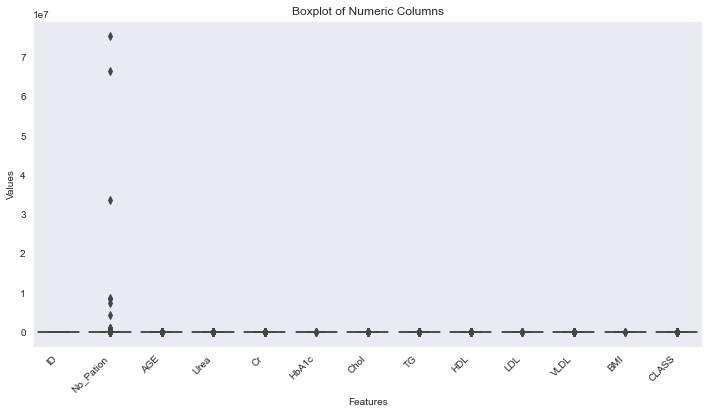

In [11]:
# Plotting a boxplot to check for outliers
features_to_plot = data.select_dtypes(include = ['number'])
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show();

#### There are outliers present in our dataset. However, we will choose to retain them rather than drop them

# PREDICTIVE MODELLING

In [12]:
# Class frequency of target variable 
print(data.CLASS.value_counts())
print(data.CLASS.value_counts(normalize = True))

1    844
0    103
Name: CLASS, dtype: int64
1    0.891235
0    0.108765
Name: CLASS, dtype: float64


1    844
0    103
Name: CLASS, dtype: int64


Text(0, 0.5, 'Count')

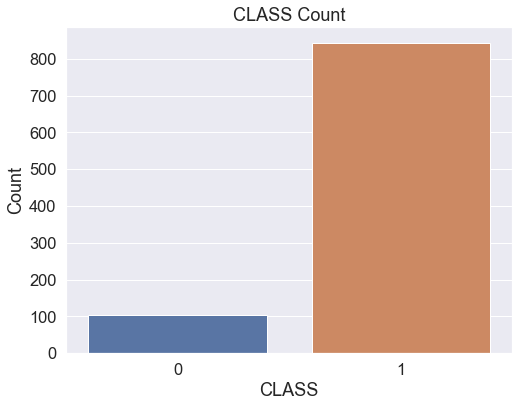

In [36]:
# Display value counts of unique items
print(data.CLASS.value_counts())

# Set custom font parameters
sns.set(font_scale=1.5)

# Create a countplot of the 'churn' feature
plt.figure(figsize=(8, 6))  
sns.countplot(x='CLASS', data=data)
plt.title("CLASS Count")
plt.xlabel("CLASS")
plt.ylabel("Count")


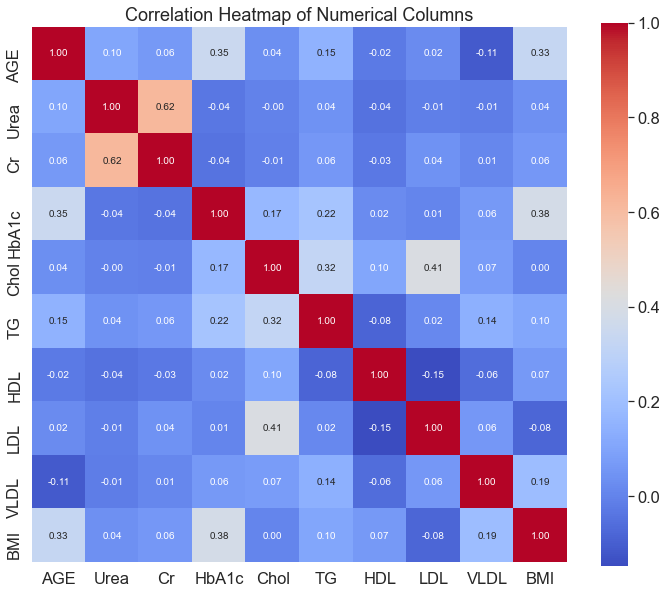

In [37]:
# Calculate the correlation matrix for all numeric columns

# Define numeric features
numeric_features = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Compute correlation matrix from DataFrame
correlation_matrix = data[numeric_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", square=True, fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

## Define the features

In [13]:
# Define features (X) and target (y)
X = data.drop(columns=['ID', 'No_Pation', 'CLASS'])  
y = data['CLASS']


In [14]:
## Create training and test sets
SEED = 42
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state = SEED)

In [15]:
X_train.shape ,X_test.shape

((662, 11), (285, 11))

## Encode categorical data as numbers

Since all of our data is currently categorical (recall that each column is in string format), we need to encode them as numbers. For this, we'll use a handy helper object from sklearn's `preprocessing` module called `OneHotEncoder`

In [16]:
# Define numeric and categorical columns explicitly

numeric_features = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
categorical_features = ['Gender']  # remove 'CLASS' here

# One-hot encode only categorical features in X_train
ohe = OneHotEncoder(drop='first', sparse=False)

X_train_ohe = ohe.fit_transform(X_train[categorical_features])

# Create DataFrame with proper column names
ohe_df = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(categorical_features), index=X_train.index)



# Fit scaler on training numeric features and transform
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train[numeric_features])

# Convert scaled numeric features back to DataFrame
num_df = pd.DataFrame(X_train_num_scaled, columns=numeric_features, index=X_train.index)

# Combine scaled numeric features and one-hot encoded categorical features
X_train_processed = pd.concat([num_df, ohe_df], axis=1)

# Show resulting DataFrame after preprocessing
X_train_processed.head()

# One-hot encode categorical features in X_test using the fitted encoder
X_test_ohe = ohe.transform(X_test[categorical_features])

# Create DataFrame with proper column names for X_test
ohe_test_df = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(categorical_features), index=X_test.index)

# Scale numeric features in X_test using the fitted scaler
X_test_num_scaled = scaler.transform(X_test[numeric_features])

# Convert scaled numeric features back to DataFrame
num_test_df = pd.DataFrame(X_test_num_scaled, columns=numeric_features, index=X_test.index)

# Combine scaled numeric features and one-hot encoded categorical features for X_test
X_test_processed = pd.concat([num_test_df, ohe_test_df], axis=1)

# Show resulting DataFrame after preprocessing X_test
X_test_processed.head()

,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Gender_M,Gender_f
642,0.222816,0.369707,0.251210,1.560189,0.075517,-0.032821,-0.570948,0.500034,-0.241451,-0.797244,1.0,0.0
985,2.484784,1.656291,0.635108,0.085106,-0.527705,-0.547515,-0.432973,-0.038345,-0.317807,0.394293,0.0,0.0
192,-2.515356,-0.595231,0.088792,0.512104,-1.884955,-0.326932,-0.570948,-0.128075,2.838275,-1.756432,1.0,0.0
86,-3.467764,1.559797,-0.516584,-1.700520,-0.452303,0.849511,-0.570948,-1.204834,-0.292355,-1.591603,0.0,0.0
39,-1.562949,-0.563067,-0.324635,-1.700520,-0.376900,-0.547515,-0.570948,0.320574,-0.317807,-1.393013,0.0,0.0


In [17]:
# Apply SMOTE to training data only 
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)

In [18]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({1: 593, 0: 69})
After SMOTE: Counter({1: 593, 0: 593})


In [19]:
#Fitting the logistic model
model = LogisticRegression()
model.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [20]:
y_pred = model.predict(X_test_processed)

In [21]:
# Make predictions for the test data using your preprocessed X_test
y_pred = model.predict(X_test_processed)

# Calculate accuracy
print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.9789473684210527


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        34
           1       0.99      0.98      0.99       251

    accuracy                           0.98       285
   macro avg       0.94      0.96      0.95       285
weighted avg       0.98      0.98      0.98       285



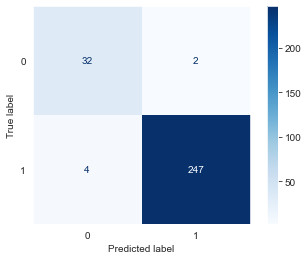

In [23]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix with labels from your classifier classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [24]:
#roc and auc

fpr,tpr,thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
print(roc_auc)

0.9626201078040778


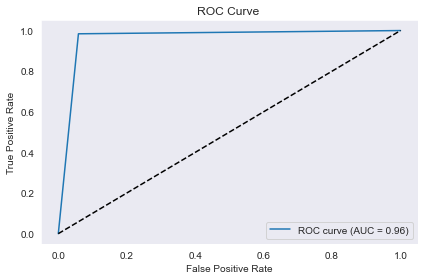

In [25]:
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve ")
plt.legend()
plt.tight_layout()
plt.show()

## MODEL 2:UNTUNED DECISION TREE MODEL

## Train the classifier and make predictions

In [26]:
# create a decision tree
# Create the classifier, fit it on the training data and make predictions on the test set

model1 = DecisionTreeClassifier(random_state =SEED)
model1.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

## Plot the decision tree
You can see what rules the tree learned by plotting this decision tree, using matplotlib and sklearn's plot_tree function.

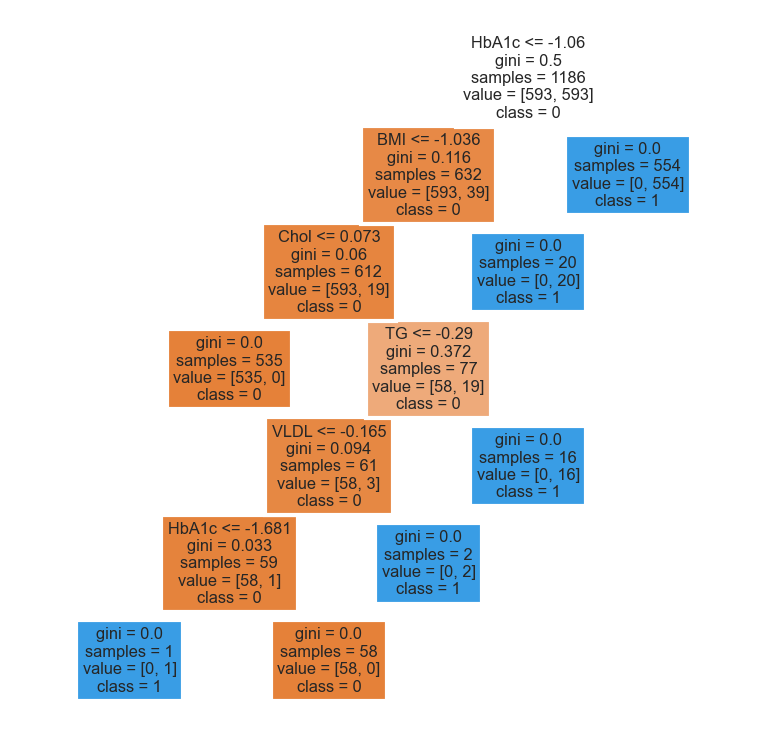

Tree depth: 6
Number of leaves: 7


In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(model1,
               feature_names = X_train_smote.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()
print("Tree depth:", model1.get_depth())
print("Number of leaves:", model1.get_n_leaves())

## MODEL 3: DECISION TREE MODEL

### Re-grow the tree using entropy 

In [28]:
# Instantiate and fit a DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion = 'entropy',random_state=SEED)
model1.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Make predictions

In [29]:
# Make predictions using test set 
y_pred = model1.predict(X_test_processed)

# Check the AUC of predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.981310053902039

# Plot and show decision tree

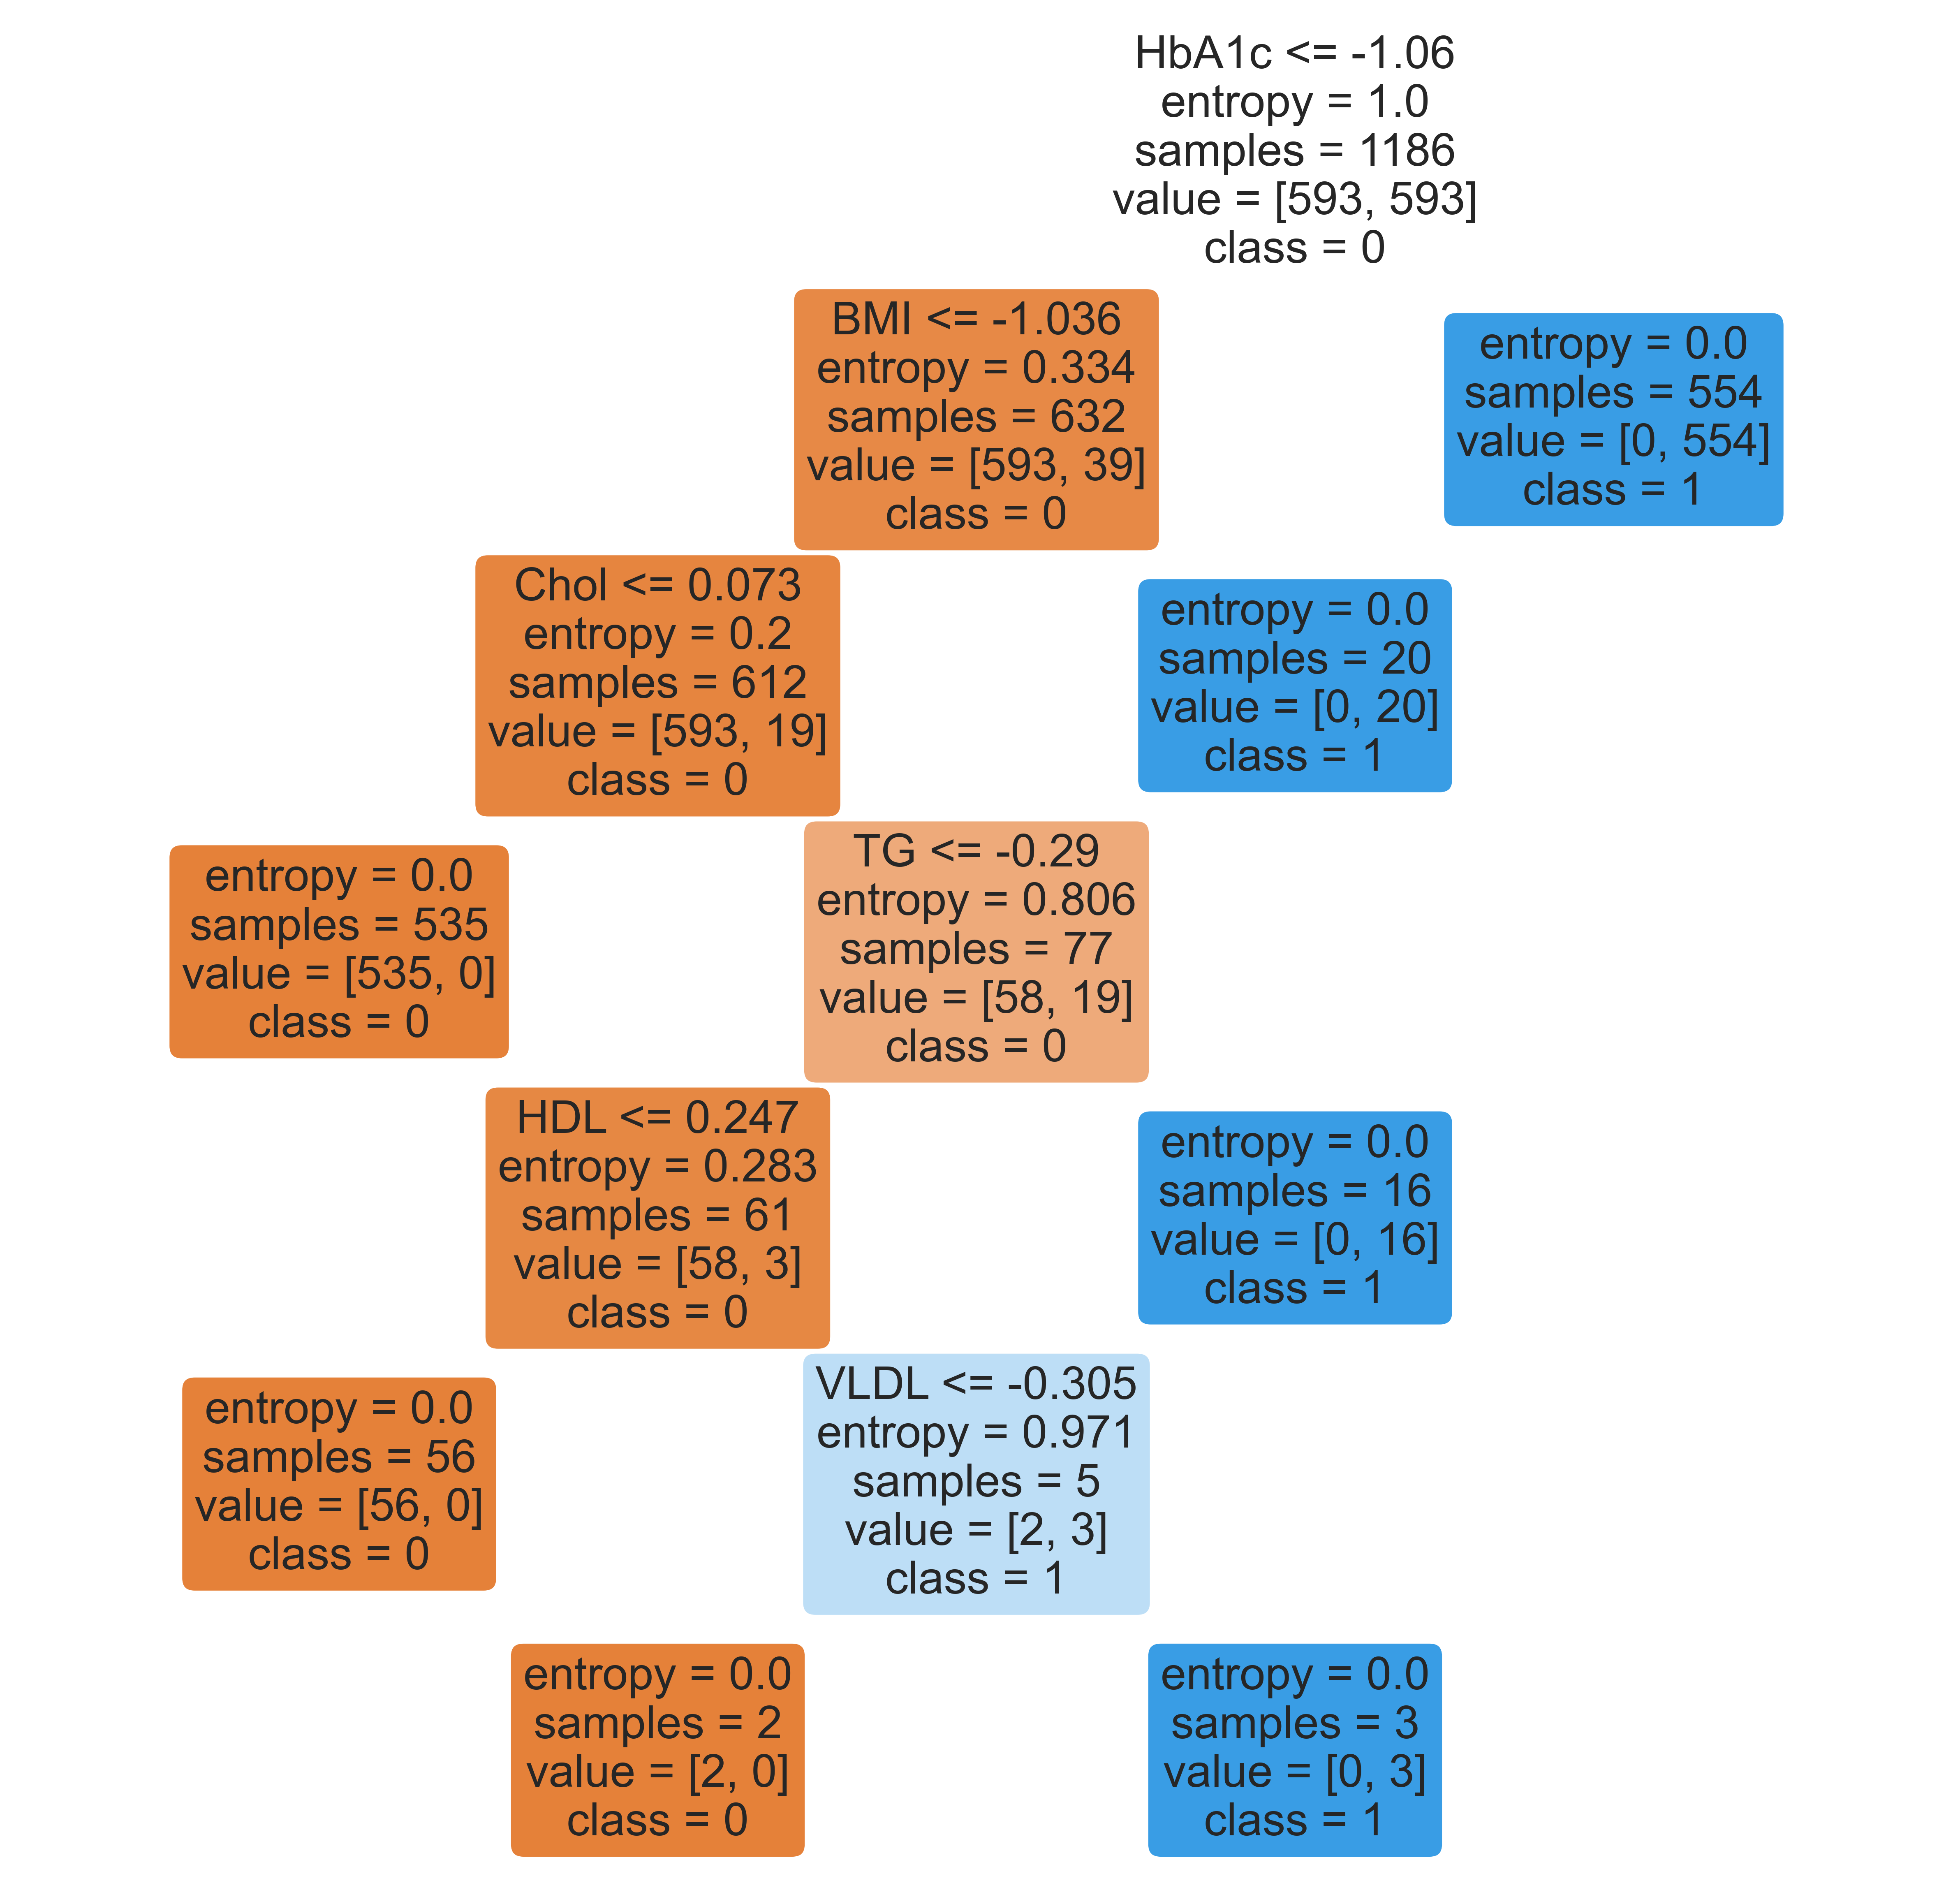

Tree depth: 6
Number of leaves: 7


In [30]:
# Plot and show decision tree
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(model1, 
               feature_names=X_train_smote.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()
print("Tree depth:", model1.get_depth())
print("Number of leaves:", model1.get_n_leaves())

# Hyperparameter Tuning and Pruning in Decision Trees

- Decision trees are prone to overfitting and effective pruning can reduce this likelihood

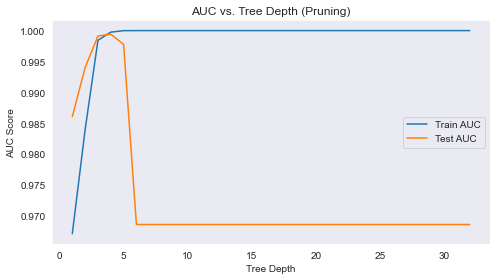

In [31]:
#Max Depth
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

depths = range(1, 33)
train_auc = []
test_auc = []

for d in depths:
    model1 = DecisionTreeClassifier(max_depth=d, criterion='entropy', random_state=1)
    model1.fit(X_train_smote, y_train_smote)

    y_train_pred = model1.predict_proba(X_train_smote)[:, 1]
    y_test_pred = model1.predict_proba(X_test_processed)[:, 1]

    train_auc.append(auc(*roc_curve(y_train_smote, y_train_pred)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred)[:2]))

# Plot AUC vs Tree Depth
plt.figure(figsize=(7, 4))
plt.plot(depths, train_auc, label="Train AUC")
plt.plot(depths, test_auc, label="Test AUC")
plt.xlabel("Tree Depth")
plt.ylabel("AUC Score")
plt.title("AUC vs. Tree Depth (Pruning)")
plt.legend()
plt.tight_layout()
plt.show()


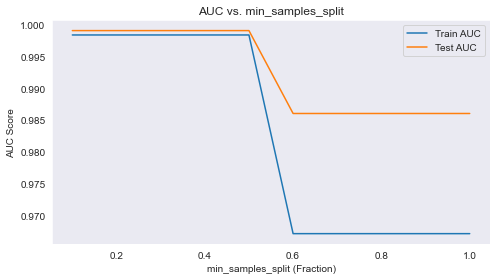

In [32]:
#minimum_splits : minimum number of samples needed to split an internal node. lets test values from 0.1 to 1.0.
maximum_splits = np.arange(0.1, 1.1, 0.1)
train_auc = []
test_auc = []

for s in maximum_splits:
    model1 = DecisionTreeClassifier(min_samples_split=s, criterion='entropy', random_state=SEED)
    model1.fit(X_train_smote, y_train_smote)

    y_train_pred = model1.predict_proba(X_train_smote)[:, 1]
    y_test_pred = model1.predict_proba(X_test_processed)[:, 1]
    
    train_auc.append(auc(*roc_curve(y_train_smote, y_train_pred)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred)[:2]))

# Plot
plt.figure(figsize=(7, 4))
plt.plot(maximum_splits, train_auc, label="Train AUC")
plt.plot(maximum_splits, test_auc, label="Test AUC")
plt.xlabel("min_samples_split (Fraction)")
plt.ylabel("AUC Score")
plt.title("AUC vs. min_samples_split")
plt.legend()
plt.tight_layout()
plt.show()


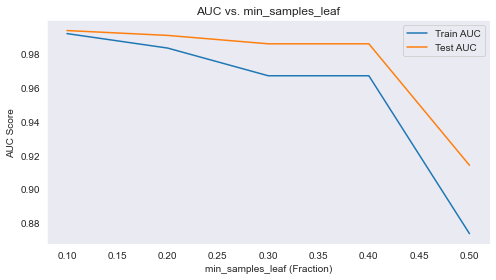

In [33]:
#min_samples_leaf :Controls the minimum number of samples required to be at a leaf node

leafs = np.arange(0.1, 0.6, 0.1)
train_auc = []
test_auc = []

for l in leafs:
    model1 = DecisionTreeClassifier(min_samples_leaf=l, criterion='entropy', random_state=SEED)
    model1.fit(X_train_smote, y_train_smote)

    y_train_pred = model1.predict_proba(X_train_smote)[:, 1]
    y_test_pred = model1.predict_proba(X_test_processed)[:, 1]
    
    train_auc.append(auc(*roc_curve(y_train_smote, y_train_pred)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred)[:2]))

plt.figure(figsize=(7, 4))
plt.plot(leafs, train_auc, label="Train AUC")
plt.plot(leafs, test_auc, label="Test AUC")
plt.xlabel("min_samples_leaf (Fraction)")
plt.ylabel("AUC Score")
plt.title("AUC vs. min_samples_leaf")
plt.legend()
plt.tight_layout()
plt.show()

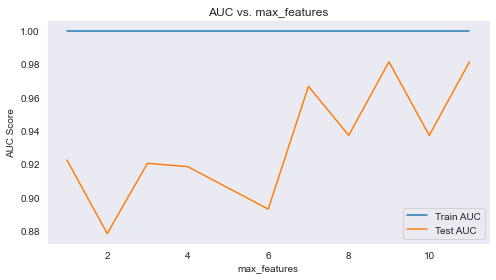

In [34]:
max_features = range(1, X.shape[1] + 1)
train_auc = []
test_auc = []

for f in max_features:
    model1 = DecisionTreeClassifier(max_features=f, criterion='entropy', random_state=SEED)
    model1.fit(X_train_smote, y_train_smote)

    y_train_pred = model1.predict_proba(X_train_smote)[:, 1]
    y_test_pred = model1.predict_proba(X_test_processed)[:, 1]
    
    train_auc.append(auc(*roc_curve(y_train_smote, y_train_pred)[:2]))
    test_auc.append(auc(*roc_curve(y_test, y_test_pred)[:2]))

# Plot
plt.figure(figsize=(7, 4))
plt.plot(max_features, train_auc, label="Train AUC")
plt.plot(max_features, test_auc, label="Test AUC")
plt.xlabel("max_features")
plt.ylabel("AUC Score")
plt.title("AUC vs. max_features")
plt.legend()
plt.tight_layout()
plt.show()

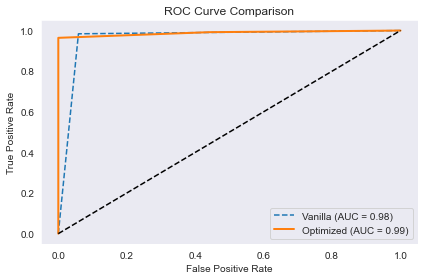

In [35]:
# Final Decision tree model
dt_pruning = DecisionTreeClassifier(
    criterion='entropy',
    max_depth= 4,
    min_samples_split=0.5,
    min_samples_leaf=0.2,
    max_features=7,
    
    random_state=SEED)

dt_pruning.fit(X_train_smote, y_train_smote)

y_pred_pruned = dt_pruning.predict_proba(X_test_processed)[:, 1]
fpr_opt, tpr_opt,thresholds = roc_curve(y_test, y_pred_pruned)
roc_auc_pruned = auc(fpr_opt, tpr_opt)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Vanilla (AUC = {roc_auc:.2f})', linestyle='--')
plt.plot(fpr_opt, tpr_opt, label=f'Optimized (AUC = {roc_auc_pruned:.2f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.tight_layout()
plt.show()